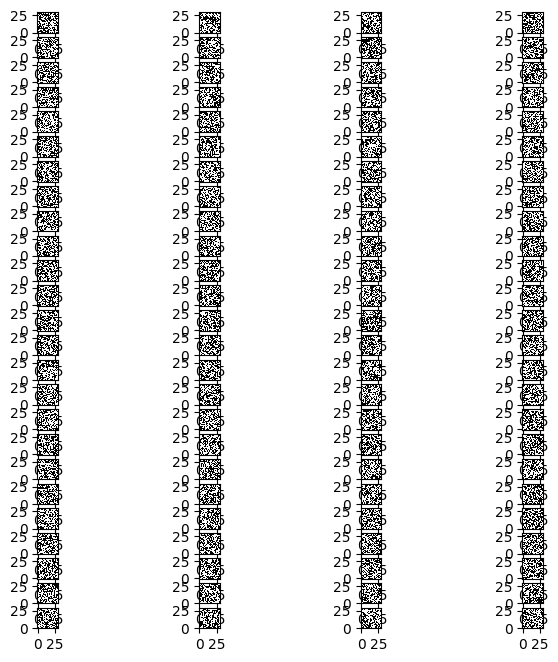

In [26]:
import os
from os import listdir, mkdir
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd

random_data_folder = Path("../data/random")
random_data_folder.resolve()
shape = (30, 30)

def flatten_read_image(input_image):
    """

    :param input_image: black and white image imported with plt.imread() function
    :return: array of 0's and 1's describing imported image
    """
    prepared_image = []

    for element in input_image:
        element_flatten = []
        for row in element:
            element_flatten.append(row[0])
        prepared_image.append(element_flatten)

    prepared_image.reverse()
    return prepared_image


def import_images(path):
    imported_images = []

    for file in listdir(path):
        img = plt.imread(path.joinpath(file))
        flatten_image = flatten_read_image(img)
        imported_images.append(flatten_image)

    return imported_images


images = import_images(random_data_folder.joinpath(f"{shape[0]}x{shape[1]}"))
import matplotlib.cm as cm
import math

def show_images(images, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    rows = math.ceil(len(images) / columns)
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image, interpolation='none', cmap=color_map, origin='lower')
    plt.show()

def show_images_from_flatten_arrays(dataframes, shape, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    rows = math.ceil(len(dataframes) / columns)
    for i, dataframe in enumerate(dataframes):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(dataframe.reshape(shape), interpolation='none', cmap=color_map, origin='lower')
    plt.show()

def count_score(reference_images, results):
    score = 0
    for result in results:
        alter_result = result.copy()
        alter_result[alter_result == -1] = 0
        alter_result[alter_result == 1] = -1
        alter_result[alter_result == 0] = 1
        for image in reference_images:
            if (image == result).all():
                score += 1
                break
            elif (image == alter_result).all():
                score += 1
                break

    return score/len(results)


cmap = cm.gray
show_images(images, cmap)

In [ ]:
import neurolab as nl
import numpy as np

## Test 01
Easy test with **one** image to learn

In [ ]:
train_data01 = images[0]
train_data02 = images[3]

In [ ]:
train_data01

In [ ]:
train_images = pd.DataFrame(train_data02)
train_images = np.asarray(train_images)
train_images = train_images.flatten()
train_images[train_images == 0] = -1

test = pd.DataFrame(train_data01)
test = np.asarray(test)
test = test.flatten()
test[test == 0] = -1

In [ ]:
# image used to train the network
show_images_from_flatten_arrays([train_images], shape=shape, color_map=cmap)

In [ ]:
# image used to test the network
show_images_from_flatten_arrays([test], shape=shape, color_map=cmap)

In [ ]:
net = nl.net.newhop([train_images])

In [ ]:
output = net.sim([test])

In [ ]:
output

In [ ]:
comp = (output == train_images)

show_images_from_flatten_arrays([output, train_images], shape, cmap)

print(f"Score: {count_score([train_images], [output])}")


## Test 02
Test with **n** images to learn and **m** images to test

In [ ]:
import random

n = 5
m = 4
random.shuffle(images)
train_data = images[:n]
test_data = images[n:n + m]

print(f"Number of images to learn: {n}")
print(f"Drawn train images:")
show_images(train_data, cmap)
print(f"Number of images to test: {m}")
print(f"Drawn test images:")
show_images(test_data, cmap)

In [ ]:
train_images = []
for image in train_data:
    transformed = np.asarray(pd.DataFrame(image)).flatten()
    transformed[transformed == 0] = -1
    train_images.append(transformed)

test_images = []
for image in test_data:
    transformed = np.asarray(pd.DataFrame(image)).flatten()
    transformed[transformed == 0] = -1
    test_images.append(transformed)


In [ ]:
show_images_from_flatten_arrays(train_images, shape, cmap)
show_images_from_flatten_arrays(test_images, shape, cmap)

In [ ]:
net = nl.net.newhop(train_images)

In [ ]:
output = net.sim(test_images)

In [ ]:
print(f"Score: {count_score(train_images, output)}")
print("Drawn images to learn (train):")
show_images_from_flatten_arrays(train_images, shape, cmap)
print("Output images:")
show_images_from_flatten_arrays(output, shape, cmap)

## Iterable tests
make test for different resolutions of random images and create plots of model correctness based on number of training images set

In [14]:
import os
from pathlib import Path

random_data_dir = Path("../data/random")
random_data_folders = os.listdir(random_data_dir.resolve())

In [15]:
shapes = []
for folder in random_data_folders:
    name_split = folder.split('x')
    shapes.append((int(name_split[0]), int(name_split[1])))

print(shapes)

[(10, 10), (30, 30), (3, 3), (50, 50), (5, 5)]


[Shape = (10, 10); N = 1]Score: 0.9113924050632911
[Shape = (10, 10); N = 2]Score: 0.8987341772151899
[Shape = (10, 10); N = 3]Score: 0.7848101265822784
[Shape = (10, 10); N = 5]Score: 0.6329113924050633
[Shape = (10, 10); N = 8]Score: 0.45569620253164556
[Shape = (10, 10); N = 13]Score: 0.11392405063291139
[Shape = (10, 10); N = 21]Score: 0.0


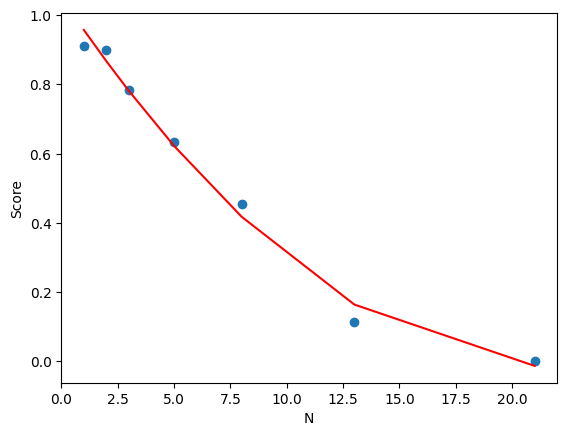

[Shape = (30, 30); N = 1]Score: 0.9493670886075949
[Shape = (30, 30); N = 2]Score: 1.0
[Shape = (30, 30); N = 3]Score: 0.7215189873417721
[Shape = (30, 30); N = 5]Score: 0.6329113924050633
[Shape = (30, 30); N = 8]Score: 0.6075949367088608
[Shape = (30, 30); N = 13]Score: 0.4430379746835443
[Shape = (30, 30); N = 21]Score: 0.25316455696202533


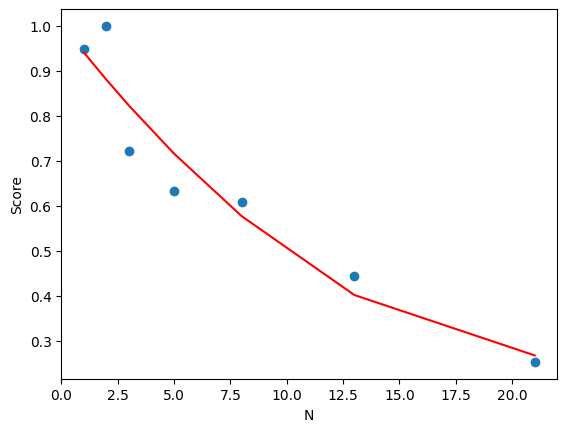

[Shape = (3, 3); N = 1]Score: 1.0
[Shape = (3, 3); N = 2]Score: 0.5949367088607594
[Shape = (3, 3); N = 3]Score: 0.569620253164557
[Shape = (3, 3); N = 5]Score: 0.7721518987341772
[Shape = (3, 3); N = 8]Score: 0.6455696202531646
[Shape = (3, 3); N = 13]Score: 0.4177215189873418
[Shape = (3, 3); N = 21]Score: 0.6075949367088608


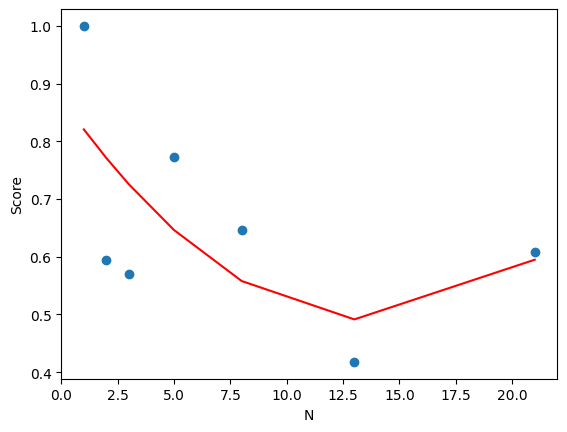

[Shape = (50, 50); N = 1]Score: 0.9873417721518988
[Shape = (50, 50); N = 2]Score: 0.9746835443037974
[Shape = (50, 50); N = 3]Score: 0.7468354430379747
[Shape = (50, 50); N = 5]Score: 0.4936708860759494
[Shape = (50, 50); N = 8]Score: 0.6075949367088608
[Shape = (50, 50); N = 13]Score: 0.6708860759493671
[Shape = (50, 50); N = 21]Score: 0.3291139240506329


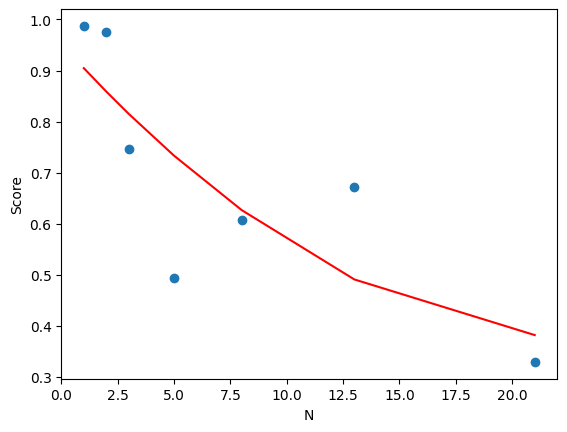

[Shape = (5, 5); N = 1]Score: 0.9625
[Shape = (5, 5); N = 2]Score: 0.75
[Shape = (5, 5); N = 3]Score: 0.6625
[Shape = (5, 5); N = 5]Score: 0.1625
[Shape = (5, 5); N = 8]Score: 0.0125
[Shape = (5, 5); N = 13]Score: 0.0
[Shape = (5, 5); N = 21]Score: 0.0


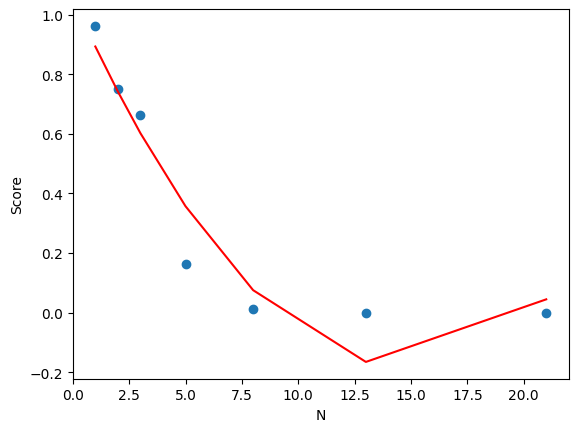

In [87]:
import matplotlib.pyplot as plt
import random
import numpy as np
import neurolab as nl


n_vector = [1, 2,3,5,8,13,21]
data_dict = {'n': n_vector}

scores = []
for shape in shapes:
    images = import_images(random_data_folder.joinpath(f"{shape[0]}x{shape[1]}"))
    m = len(images) - max(n_vector)
    for n in n_vector:
        random.shuffle(images)
        train_data = images[:n]
        test_data = images[n:n+m]

        train_preprocessed_images = []
        for image in train_data:
            transformed = np.asarray(pd.DataFrame(image)).flatten()
            transformed[transformed == 0] = -1
            train_preprocessed_images.append(transformed)

        test_preprocessed_images = []
        for image in test_data:
            transformed = np.asarray(pd.DataFrame(image)).flatten()
            transformed[transformed == 0] = -1
            test_preprocessed_images.append(transformed)

        net = nl.net.newhop(train_preprocessed_images)
        output = net.sim(test_preprocessed_images)

        score = count_score(train_preprocessed_images, output)
        scores.append(score)
        print(f"[Shape = {shape}; N = {n}]Score: {score}")
    data_dict[f"{shape[0]}x{shape[1]}"] = scores
    plt.scatter(n_vector, scores)
    z = np.polyfit(n_vector, scores, 2)
    p = np.poly1d(z)
    plt.plot(n_vector,p(n_vector), "r-")
    plt.xlabel('N')
    plt.ylabel('Score')
    plt.show()
    scores = []

df = pd.DataFrame(data_dict).set_index('n')

In [17]:
df

,10x10,30x30,3x3,50x50,5x5
n,,,,,
1,0.860759,0.962025,1.000000,0.974684,0.9625
2,0.962025,0.974684,0.620253,1.000000,0.7625
3,0.746835,0.670886,0.860759,0.734177,0.9750
5,0.582278,0.518987,0.037975,0.556962,0.4000
8,0.341772,0.696203,0.924051,0.544304,0.2875
13,0.113924,0.493671,0.468354,0.696203,0.0250
21,0.000000,0.177215,0.417722,0.303797,0.0000


In [10]:
import pandas as pd
n_vector = [1, 2,3, 5]
data = {
    'N': n_vector,
    '10x10': [0.99, 0.78, 0.43, 0.1],
    '30x30': [0.99, 0.78, 0.43, 0.1],
    '40x40': [0.99, 0.78, 0.43, 0.1]
}

df = pd.DataFrame(data).set_index('N')


In [11]:
df

,10x10,30x30,40x40
N,,,
1,0.99,0.99,0.99
2,0.78,0.78,0.78
3,0.43,0.43,0.43
5,0.10,0.10,0.10


In [61]:
life_images_dir = Path("../data/life")
noise_data_dir = Path("../data/random/16x16")

WindowsPath('../data/random/16x16')

In [62]:
image_files = os.listdir(life_images_dir.resolve())
noise_image_files = os.listdir(noise_data_dir.resolve())
noise_image_files

['img0.png',
 'img1.png',
 'img10.png',
 'img11.png',
 'img12.png',
 'img13.png',
 'img14.png',
 'img15.png',
 'img16.png',
 'img17.png',
 'img18.png',
 'img19.png',
 'img2.png',
 'img20.png',
 'img21.png',
 'img22.png',
 'img23.png',
 'img24.png',
 'img25.png',
 'img26.png',
 'img27.png',
 'img28.png',
 'img29.png',
 'img3.png',
 'img4.png',
 'img5.png',
 'img6.png',
 'img7.png',
 'img8.png',
 'img9.png']

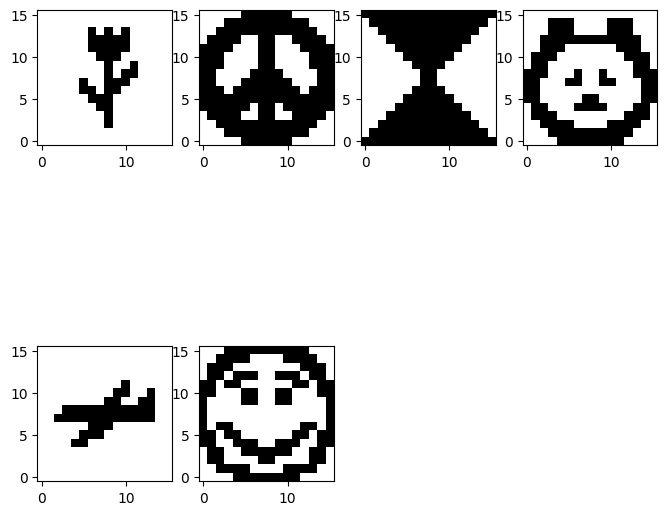

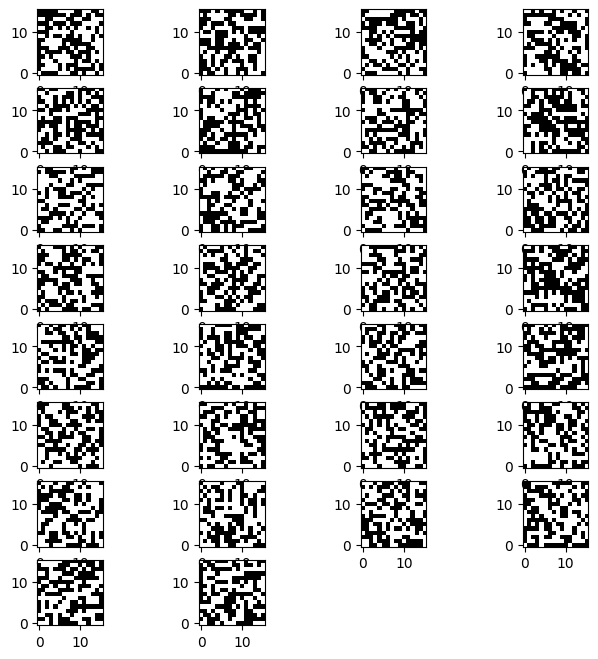

In [66]:
life_images = import_images(life_images_dir.resolve())
show_images(life_images, cmap)

noise_images = import_images(noise_data_dir.resolve())
show_images(noise_images, cmap)

[N = 1]Score: 0.9333333333333333
[N = 2]Score: 0.8666666666666667
[N = 3]Score: 0.5666666666666667
[N = 4]Score: 0.5666666666666667
[N = 5]Score: 0.26666666666666666
[N = 6]Score: 0.16666666666666666


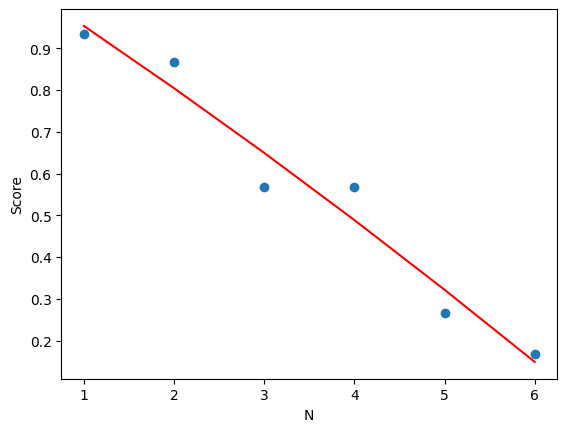

In [86]:
n_vector = [1, 2, 3, 4, 5, 6]
m = 100
scores = []

data_dict = {'n': n_vector}
for n in n_vector:
    random.shuffle(life_images)
    random.shuffle(noise_images)
    train_data = life_images[:n]
    test_data = noise_images[:m]

    train_preprocessed_images = []
    for image in train_data:
        transformed = np.asarray(pd.DataFrame(image)).flatten()
        transformed[transformed == 0] = -1
        train_preprocessed_images.append(transformed)

    test_preprocessed_images = []
    for image in test_data:
        transformed = np.asarray(pd.DataFrame(image)).flatten()
        transformed[transformed == 0] = -1
        test_preprocessed_images.append(transformed)

    net = nl.net.newhop(train_preprocessed_images)
    output = net.sim(test_preprocessed_images)

    score = count_score(train_preprocessed_images, output)
    scores.append(score)
    print(f"[N = {n}]Score: {score}")
data_dict[f"scores"] = scores
plt.scatter(n_vector, scores)
z = np.polyfit(n_vector, scores, 2)
p = np.poly1d(z)
plt.plot(n_vector,p(n_vector), "r-")
plt.xlabel('N')
plt.ylabel('Score')
plt.show()
df = pd.DataFrame(data_dict).set_index('n')

In [85]:
df

,scores
n,
1,0.966667
2,0.933333
3,0.766667
4,0.566667
5,0.533333
6,0.166667
